# Week 8. Plotting

Goal: Learn how to make plots based on ```matplotlib``` and libraries that build on top of it.

With ```matplotlib```, we use the following import convention:

In [1]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20   # only display less than 20 rows
np.random.seed(12345)
plt.rc('figure', figsize=(8, 4))
np.set_printoptions(precision=4, suppress=True)

In [3]:
#%matplotlib notebook

---

## 8.1 A Brief ```matplotlib``` API Primer

### 8.1.1 Figures and Subplots

Plots in matplotlib reside within a **Figure object**. 

***Step 1.*** Create a new figure with ```plt.figure```:
 * ```plt.figure``` has a number of options. For instance, ```figsize``` will guarantee the figure has a certain size and aspect ratio.
 
***Step 2.*** Create one or more subplots using ```add_subplot```:
 * One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in **a single notebook cell**. 
 
***Step 3.*** Add plots in each subplot
* ```ax1.hist```: histogram
* ```ax2.scatter```: scatter plot
* ```ax3.plot```: vanilla line plot

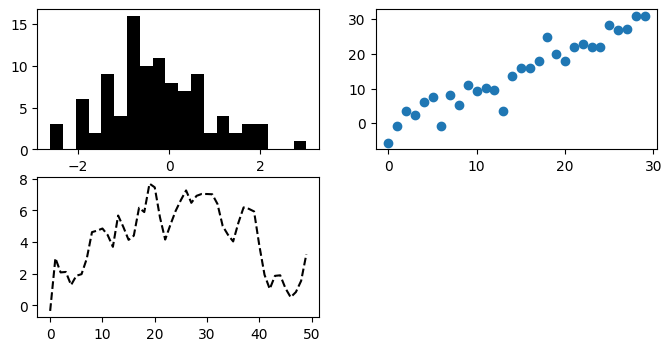

In [29]:
fig = plt.figure()   # create a new figure

ax1 = fig.add_subplot(2, 2, 1)   # add a subplot 
ax2 = fig.add_subplot(2, 2, 2)   # add a subplot
ax3 = fig.add_subplot(2, 2, 3)   # add a subplot

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=1)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')


Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, ```plt.subplots```, that creates a new figure and returns a NumPy array containing the created subplot objects:
 * The axes array can be easily indexed like a two-dimensional array; for example, ```axes[0, 1]```. 
 * You can also indicate that subplots should have the same x- or y-axis using ```sharex``` and ```sharey```, respectively. This is especially useful when you’re comparing data on the same scale.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

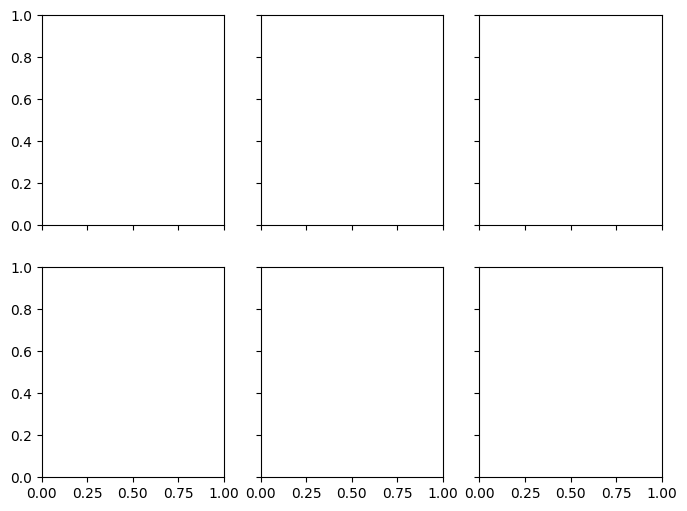

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(8,6), sharex=True, sharey=True)
axes

**```pyplot.subplots``` options**

* ```nrows``` Number of rows of subplots
* ```ncols``` Number of columns of subplots
* ```sharex``` All subplots should use the same x-axis ticks (adjusting the ```xlim``` will affect all subplots)
* ```sharey``` All subplots should use the same y-axis ticks (adjusting the ```ylim``` will affect all subplots)
* ```subplot_kw``` Dict of keywords passed to ```add_subplot``` call used to create each subplot

#### Adjusting the spacing around subplots

You can change the spacing (among different figures in the same plot) using the ```subplots_adjust``` method on Figure objects, also available as a top-level function:
```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

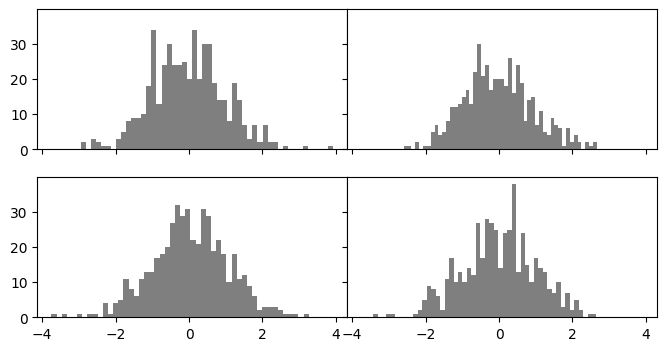

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0.0, hspace=0.2)   # TRY plt.subplots_adjust(wspace=0.2, hspace=0.2)


### 8.1.2 Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. 

For example, to plot x versus y with green dashes, you would execute:
```python
ax.plot(x, y, 'g--')
```

The same plot could also have been expressed more explicitly as:
```python
ax.plot(x, y, linestyle='--', color='g')
```

Line plots can additionally have **markers** to highlight the actual data points.

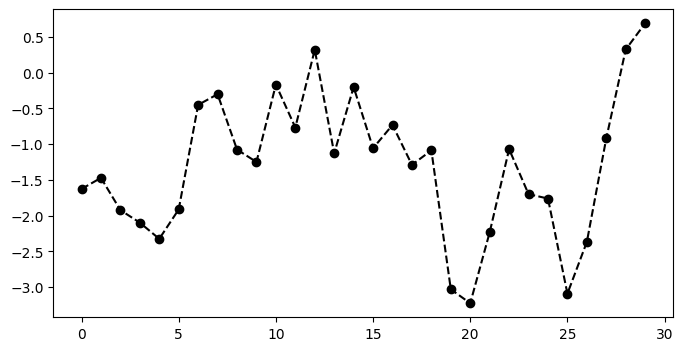

In [7]:
plt.figure()
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

```python
# Equivalently, 
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

* For line plots, you will notice that subsequent points are linearly interpolated by default.  <br>
<br>
* This can be altered with the ```drawstyle``` option. 

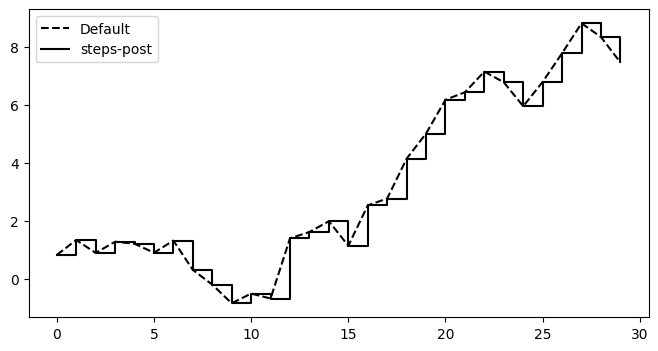

In [8]:
plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')   # You must call plt.legend (or ax.legend, if you have a reference to the axes)
                         # to create the legend

#### A detailed summary of colors, markers, and line styles are in https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html. 

### 8.1.3 Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

To change the x-axis ticks, it’s easiest to use ```set_xticks``` and ```set_xticklabels```.

Text(0.5, 0, 'Stages')

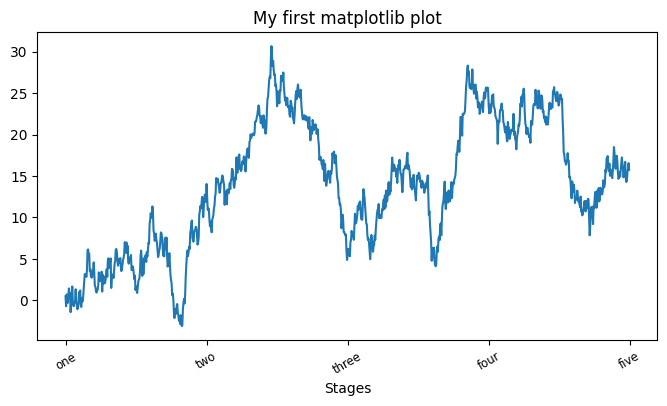

In [9]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
np.random.seed(1234)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                    rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

The easiest is to pass the ```label``` argument when adding each piece of the plot:

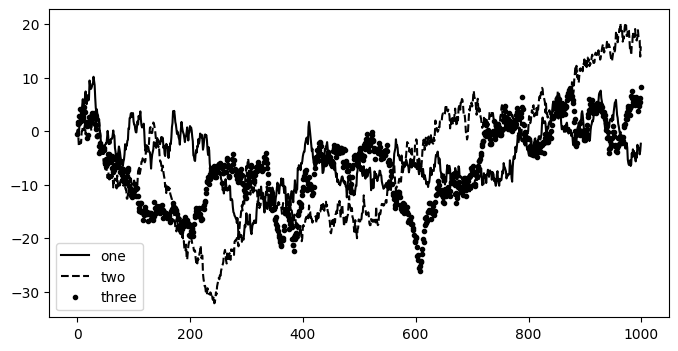

In [10]:
#from numpy.random import randn
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
np.random.seed(12345)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

In [11]:
ax.legend(loc='best')   # The loc tells matplotlib where to place the plot. 
                        # If you aren’t picky, 'best' is a good option, 
                        # as it will choose a location that is most out of the way.

More details can be found in https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html

### 8.1.4 Annotations and Drawing on a Subplot

```text``` draws text at given coordinates ```(x, y)``` on the plot with optional custom styling:
```python
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

**Annotations** can draw both **text** and **arrows** arranged appropriately.

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

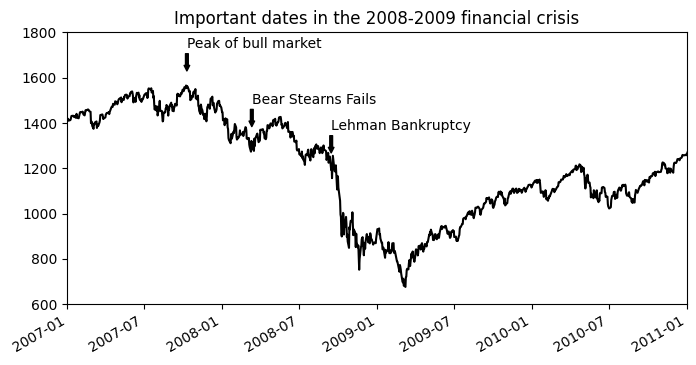

In [30]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

There are a couple of important points to highlight in this plot: 
* ```ax.annotate``` method can draw labels at the indicated x and y coordinates. 
* We use the ```set_xlim``` and ```set_ylim``` methods to manually set the start and end boundaries for the plot. 
* Lastly, ```ax.set_title``` adds a main title to the plot.

### 8.1.5 Saving Plots to File

You can save the active figure to file using ```plt.savefig```:
```python
plt.savefig('figpath.svg')
```

There are a couple of important options: 
 * ```dpi```, which controls the dots-per-inch resolution, 
 * ```bbox_inches```, which can trim the whitespace around the actual figure.
```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

---

## 8.2 Plotting with pandas

### 8.2.1 Line Plots

<Axes: >

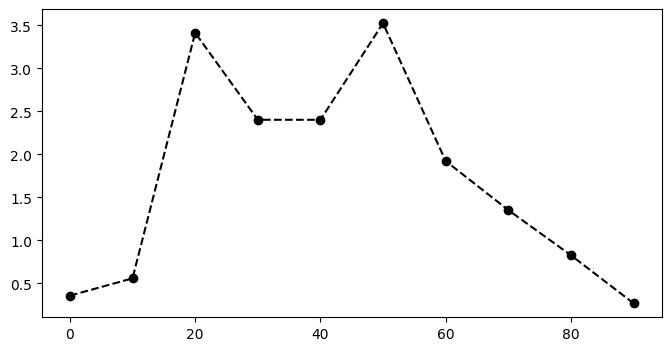

In [31]:
plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(style = 'ko--')

DataFrame’s ```plot``` method plots each of its columns as a different line on the same subplot, creating a legend automatically

<Axes: >

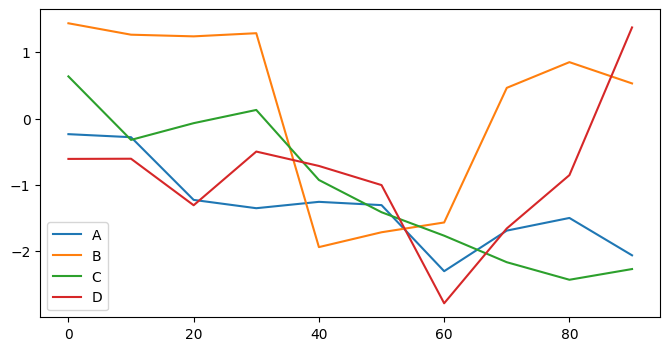

In [32]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 8.2.2 Bar Plots

The ```plot.bar()``` and ```plot.barh()``` make **vertical** and **horizontal** bar plots, respectively.

In [33]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.452072
b    0.138678
c    0.982672
d    0.749922
e    0.181883
f    0.320773
g    0.730336
h    0.309662
i    0.890373
j    0.048744
k    0.800085
l    0.299268
m    0.174340
n    0.326408
o    0.854489
p    0.141798
dtype: float64

<Axes: >

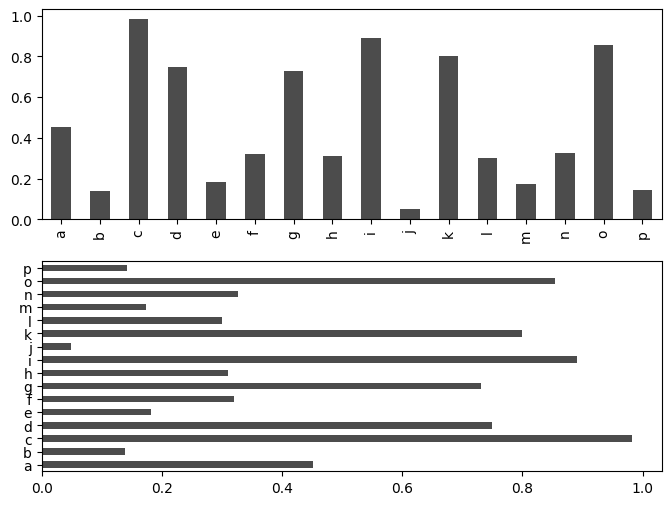

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(8,6))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)  # The options color='k' and alpha=0.7 set the color
                                                  # to black and use partial transparency on the filling.

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value

In [35]:
np.random.seed(12348)

In [36]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

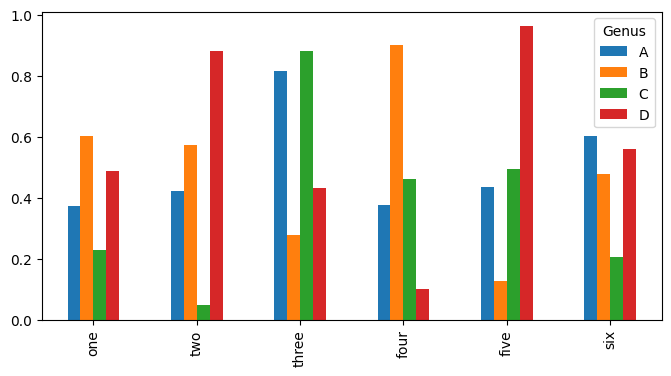

In [37]:
df.plot.bar()  # Note that the name “Genus” on the DataFrame’s columns is used to title the legend.

We create **stacked bar plots** from a DataFrame by passing ```stacked=True```, resulting in the value in each row being stacked together:

<Axes: >

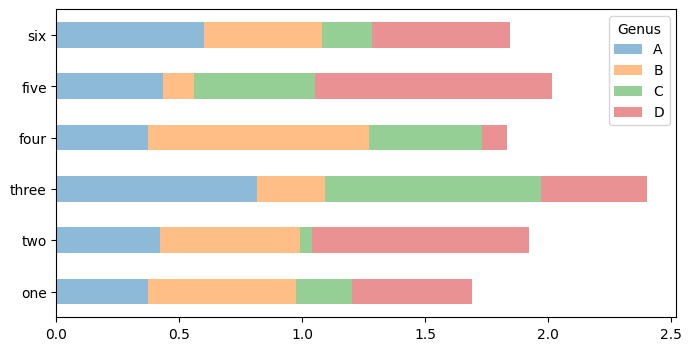

In [38]:
df.plot.barh(stacked=True, alpha=0.5)

---

## END